In [1]:
import os

from typing import List
from datetime import datetime
from collections import defaultdict

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
SRC = "../engri_2020_2024/"

In [31]:
def get_files() -> List[str]:
    return (os.path.join(root, file) for root, _, files in os.walk(SRC) for file in files)

In [83]:
site_date_count = {}
site_file_size = defaultdict(list)
for file in get_files():
    site, year, month, day, _ = file.removeprefix(SRC).split("/")
    key = (site, f"{year}/{month}/{day}")
    site_date_count[key] = site_date_count.get(key, 0) + 1
    site_file_size[(site, f"{year}/{month}/{1}")].append(os.path.getsize(file))

In [84]:
# Convert defaultdict to list of dictionaries
data = [{'site': key[0], 'date': key[1], 'file_sizes': value} for key, value in site_file_size.items()]

# Create a pandas DataFrame
df = pd.DataFrame(data)

# Explode the 'file_sizes' column to separate rows for each size
df_expanded = df.explode('file_sizes')

# Rename the 'file_sizes' column to 'file_size'
df_expanded.rename(columns={'file_sizes': 'file_size'}, inplace=True)

df_expanded['file_size'] = pd.to_numeric(df_expanded['file_size'])

df_expanded.sort_values(by=['site', 'date'], inplace=True)
# Describe per site
site_descriptions = df_expanded.groupby(['site', 'date'])['file_size'].describe()

# Print the result
site_descriptions.to_csv('site_descriptions.csv')

In [85]:
# Reset index to make 'site' and 'date' columns accessible for plotting
site_descriptions = site_descriptions.reset_index()
site_descriptions.sort_values(by=["site", "date"], inplace=True)
site_descriptions["date"] = pd.to_datetime(site_descriptions["date"])

In [86]:
len(site_descriptions)

446

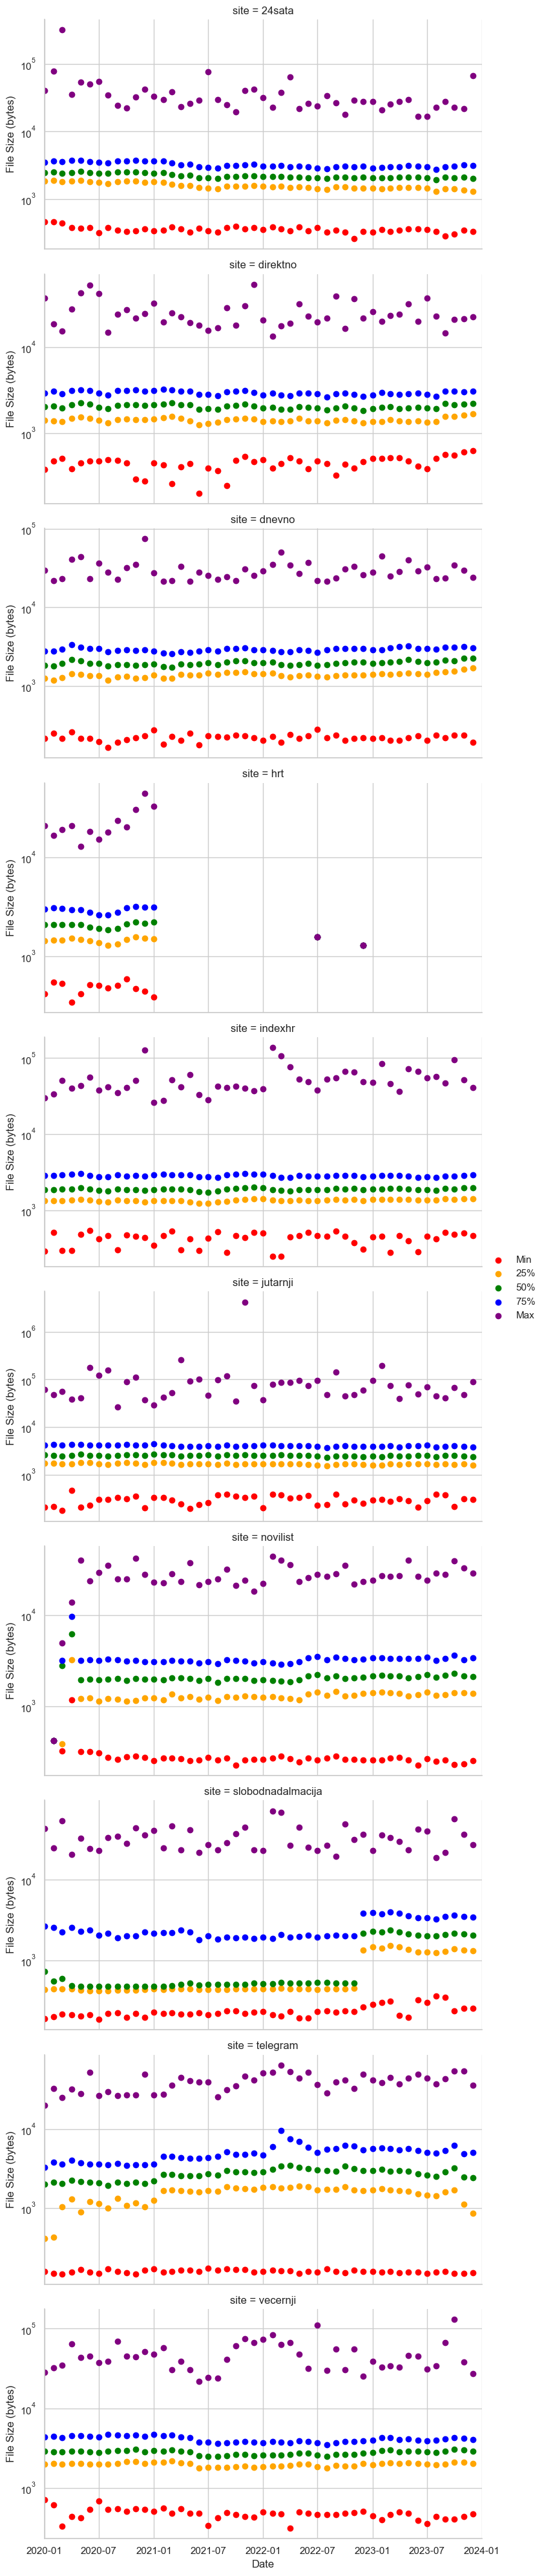

In [87]:
# Create a grid of subplots based on the 'site' column
g = sns.FacetGrid(site_descriptions, height=4, aspect=2, row="site", sharey=False)

# Plot the lines for min, max, 25%, 50%, and 75%
g.map(plt.scatter, 'date', 'min', label='Min', color="red")
g.map(plt.scatter, 'date', '25%', label='25%', color="orange")
g.map(plt.scatter, 'date', '50%', label='50%', color="green")
g.map(plt.scatter, 'date', '75%', label='75%', color="blue")
g.map(plt.scatter, 'date', 'max', label='Max', color="purple")

# Set titles and labels
g.set_titles(col_template="{col_name}")
g.set_axis_labels("Date", "File Size (bytes)")

# Add legend to the plots
g.add_legend()

g.set(yscale='log')

plt.xlim(datetime(2020, 1, 1), datetime(2024, 1, 1));

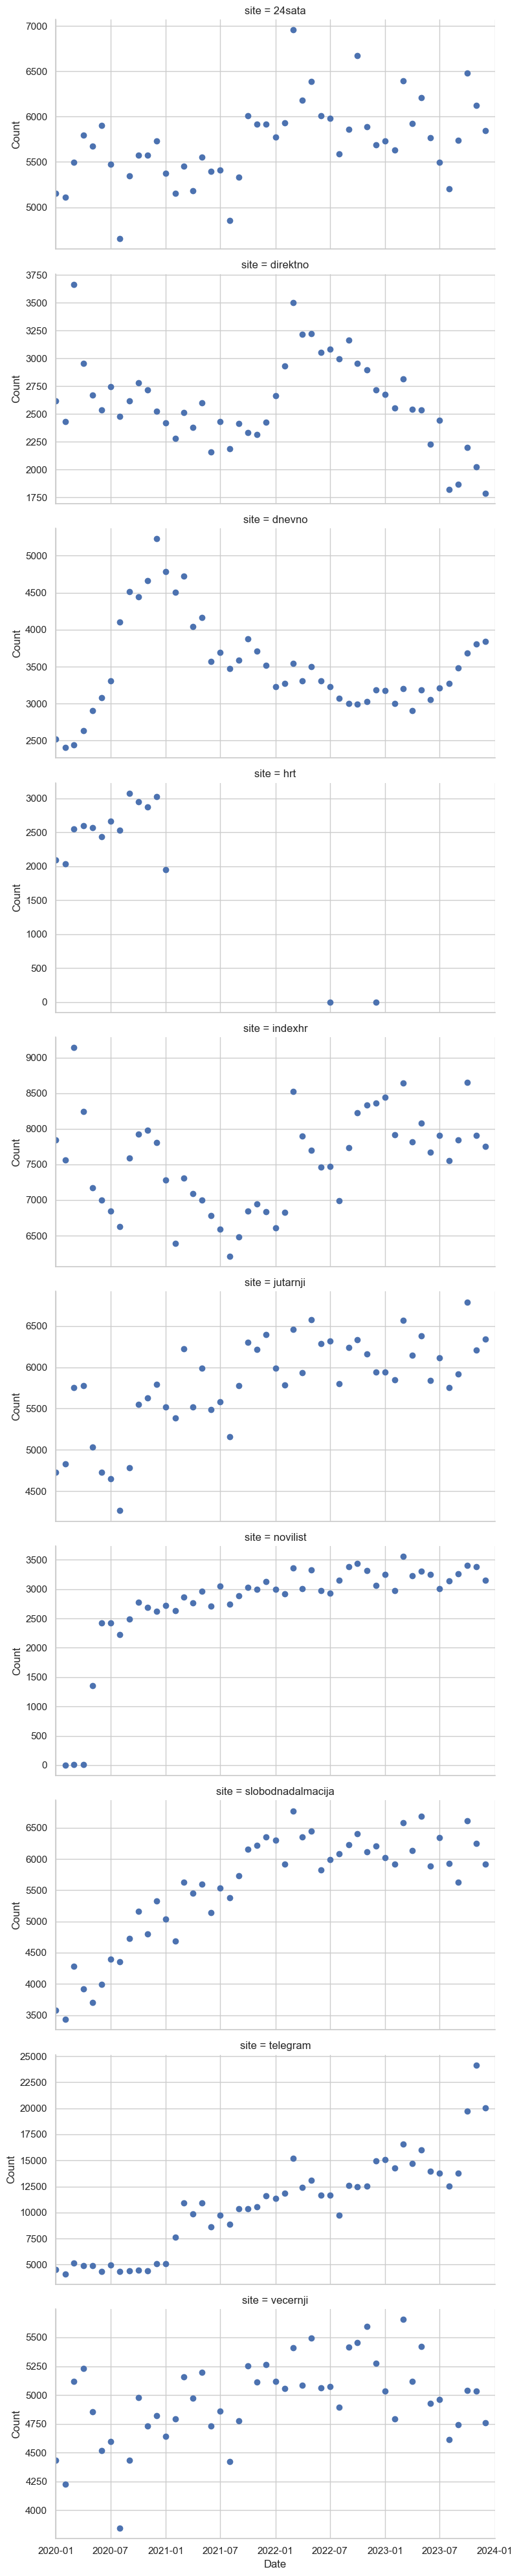

In [88]:
g = sns.FacetGrid(site_descriptions, row="site", height=4, aspect=2, sharey=False)
g.map(plt.scatter, "date", "count")
plt.xlim(datetime(2020, 1, 1), datetime(2024, 1, 1))
g.set_axis_labels("Date", "Count");

In [89]:
(sites, dates), counts = zip(*list(site_date_count.keys())), site_date_count.values()
sites_dates_counts = pd.DataFrame({"site": sites, "date": dates, "count": counts})
sites_dates_counts["date"] = pd.to_datetime(sites_dates_counts["date"])

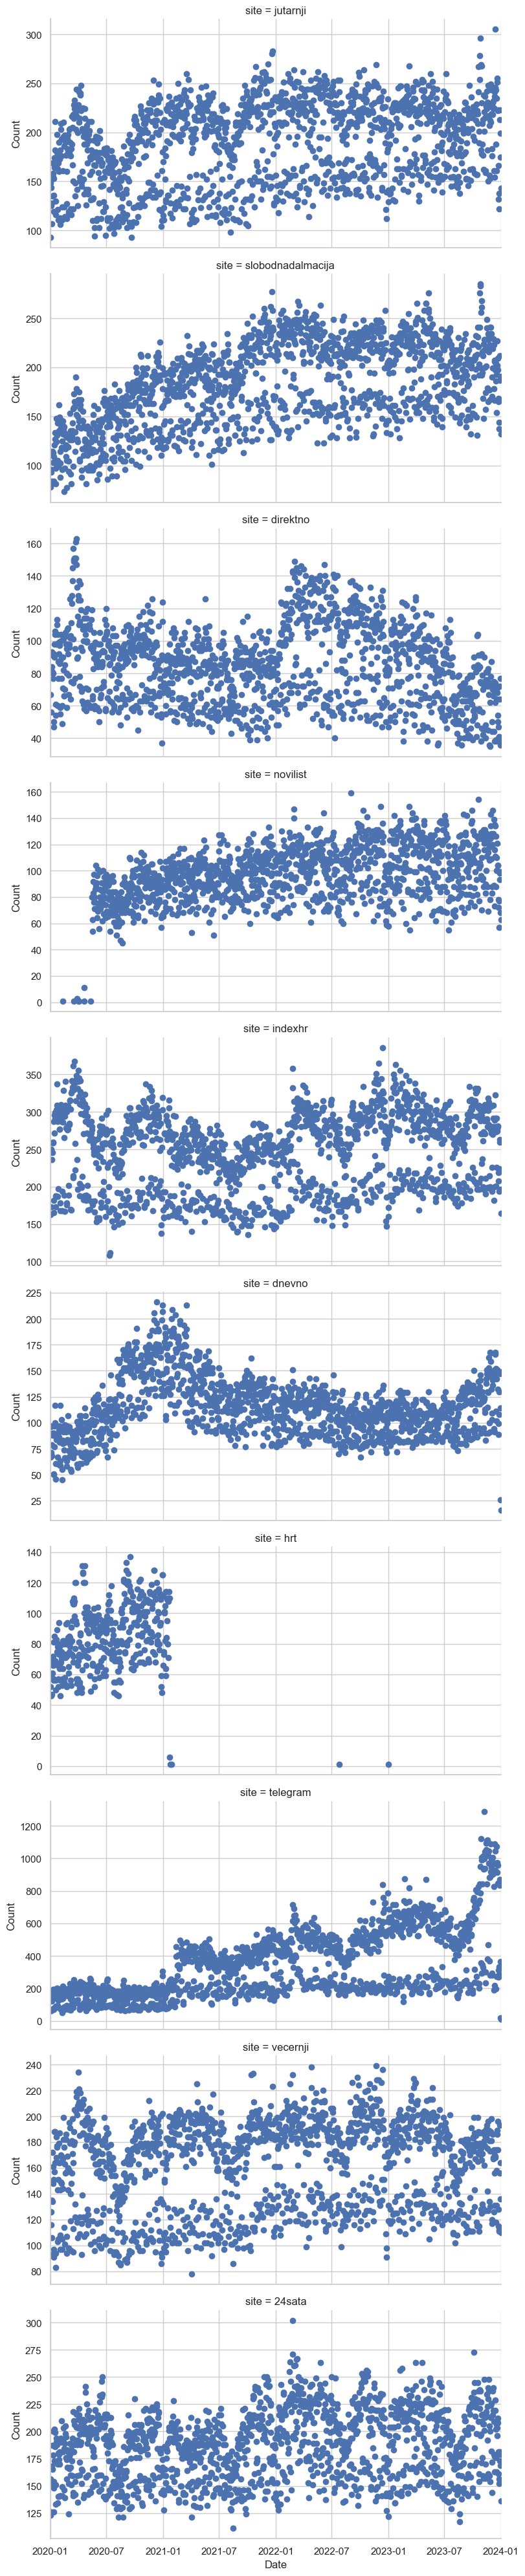

In [90]:
g = sns.FacetGrid(sites_dates_counts, row="site", height=4, aspect=2, sharey=False)
g.map(plt.scatter, "date", "count")
plt.xlim(datetime(2020, 1, 1), datetime(2024, 1, 1))
g.set_axis_labels("Date", "Count");